In [ ]:
!pip install transformers
import transformers

### Using pre-trained transformers (2pts)
_for fun and profit_

There are many toolkits that let you access pre-trained transformer models, but the most powerful and convenient by far is [`huggingface/transformers`](https://github.com/huggingface/transformers). In this week's practice, you'll learn how to download, apply and modify pre-trained transformers for a range of tasks. Buckle up, we're going in!


__Pipelines:__ if all you want is to apply a pre-trained model, you can do that in one line of code using pipeline. Huggingface/transformers has a selection of pre-configured pipelines for masked language modelling, sentiment classification, question aswering, etc. ([see full list here](https://huggingface.co/transformers/main_classes/pipelines.html))

A typical pipeline includes:
* pre-processing, e.g. tokenization, subword segmentation
* a backbone model, e.g. bert finetuned for classification
* output post-processing

Let's see it in action:

In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

print(classifier("BERT is amazing!"))

[{'label': 'POSITIVE', 'score': 0.9998860359191895}]


In [ ]:
import base64
data = {
    'arryn': 'As High as Honor.',
    'baratheon': 'Ours is the fury.',
    'stark': 'Winter is coming.',
    'tyrell': 'Growing strong.'
}

# YOUR CODE: predict sentiment for each noble house and create outputs dict
outputs = {key: True if classifier(val)[0]['label']=='POSITIVE' else False for key, val in data.items()}

assert sum(outputs.values()) == 3 and outputs[base64.decodestring(b'YmFyYXRoZW9u\n').decode()] == False
print("Well done!")

Well done!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: decodestring() is a deprecated alias since Python 3.1, use decodebytes()
  if sys.path[0] == '':


You can also access vanilla Masked Language Model that was trained to predict masked words. Here's how:

In [ ]:
mlm_model = pipeline('fill-mask', model="bert-base-uncased")
MASK = mlm_model.tokenizer.mask_token

for hypo in mlm_model(f"Donald {MASK} is the president of the united states."):
  print(f"P={hypo['score']:.5f}", hypo['sequence'])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


P=0.99719 donald trump is the president of the united states.
P=0.00024 donald duck is the president of the united states.
P=0.00022 donald ross is the president of the united states.
P=0.00020 donald johnson is the president of the united states.
P=0.00018 donald wilson is the president of the united states.


In [ ]:
# Your turn: use bert to recall what year was the Soviet Union founded in
mlm_model(f'Soviet Union founded in year {MASK}.')

[{'score': 0.019652394577860832,
  'sequence': 'soviet union founded in year 1945.',
  'token': 3386,
  'token_str': '1945'},
 {'score': 0.018977005034685135,
  'sequence': 'soviet union founded in year 1947.',
  'token': 4006,
  'token_str': '1947'},
 {'score': 0.017779849469661713,
  'sequence': 'soviet union founded in year 1917.',
  'token': 4585,
  'token_str': '1917'},
 {'score': 0.012720368802547455,
  'sequence': 'soviet union founded in year 1949.',
  'token': 4085,
  'token_str': '1949'},
 {'score': 0.012019014917314053,
  'sequence': 'soviet union founded in year 1948.',
  'token': 3882,
  'token_str': '1948'}]

```

```

```

```


Huggingface offers hundreds of pre-trained models that specialize on different tasks. You can quickly find the model you need using [this list](https://huggingface.co/models).


In [ ]:
text = """Almost two-thirds of the 1.5 million people who viewed this liveblog had Googled to discover
 the latest on the Rosetta mission. They were treated to this detailed account by the Guardian’s science editor,
 Ian Sample, and astronomy writer Stuart Clark of the moment scientists landed a robotic spacecraft on a comet 
 for the first time in history, and the delirious reaction it provoked at their headquarters in Germany.
  “We are there. We are sitting on the surface. Philae is talking to us,” said one scientist.
"""

# Task: create a pipeline for named entity recognition, use task name 'ner' and search for the right model in the list
ner_model = pipeline('ner')

named_entities = ner_model(text)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


In [ ]:
print('OUTPUT:', named_entities)
word_to_entity = {item['word']: item['entity'] for item in named_entities}
assert 'org' in word_to_entity.get('Guardian').lower() and 'per' in word_to_entity.get('Stuart').lower()
print("All tests passed")

OUTPUT: [{'entity': 'I-MISC', 'score': 0.88031083, 'index': 19, 'word': 'Google', 'start': 73, 'end': 79}, {'entity': 'I-MISC', 'score': 0.9005079, 'index': 27, 'word': 'Rose', 'start': 112, 'end': 116}, {'entity': 'I-MISC', 'score': 0.95096296, 'index': 28, 'word': '##tta', 'start': 116, 'end': 119}, {'entity': 'I-ORG', 'score': 0.99925345, 'index': 40, 'word': 'Guardian', 'start': 179, 'end': 187}, {'entity': 'I-PER', 'score': 0.99920094, 'index': 46, 'word': 'Ian', 'start': 207, 'end': 210}, {'entity': 'I-PER', 'score': 0.99950004, 'index': 47, 'word': 'Sam', 'start': 211, 'end': 214}, {'entity': 'I-PER', 'score': 0.99649787, 'index': 48, 'word': '##ple', 'start': 214, 'end': 217}, {'entity': 'I-PER', 'score': 0.9991856, 'index': 53, 'word': 'Stuart', 'start': 240, 'end': 246}, {'entity': 'I-PER', 'score': 0.9996484, 'index': 54, 'word': 'Clark', 'start': 247, 'end': 252}, {'entity': 'I-LOC', 'score': 0.99982107, 'index': 85, 'word': 'Germany', 'start': 414, 'end': 421}, {'entity': 

### The building blocks of a pipeline

Huggingface also allows you to access its pipelines on a lower level. There are two main abstractions for you:
* `Tokenizer` - converts from strings to token ids and back
* `Model` - a pytorch `nn.Module` with pre-trained weights

You can use such models as part of your regular pytorch code: insert is as a layer in your model, apply it to a batch of data, backpropagate, optimize, etc.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel, pipeline

model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [ ]:
lines = [
    "Luke, I am your father.",
    "Life is what happens when you're busy making other plans.",
    ]

# tokenize a batch of inputs. "pt" means [p]y[t]orch tensors
tokens_info = tokenizer(lines, padding=True, truncation=True, return_tensors="pt")

for key in tokens_info:
    print(key, tokens_info[key])

print("Detokenized:")
for i in range(2):
    print(tokenizer.decode(tokens_info['input_ids'][i]))

input_ids tensor([[ 101, 5355, 1010, 1045, 2572, 2115, 2269, 1012,  102,    0,    0,    0,
            0,    0,    0],
        [ 101, 2166, 2003, 2054, 6433, 2043, 2017, 1005, 2128, 5697, 2437, 2060,
         3488, 1012,  102]])
token_type_ids tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Detokenized:
[CLS] luke, i am your father. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[CLS] life is what happens when you're busy making other plans. [SEP]


In [ ]:
# You can now apply the model to get embeddings
with torch.no_grad():
    out = model(**tokens_info)

print(out)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.3502,  0.2246, -0.2345,  ..., -0.2232,  0.1730,  0.6747],
         [-0.6097,  0.6892, -0.5512,  ..., -0.4814,  0.5322,  1.3833],
         [ 0.1842,  0.4881,  0.2193,  ..., -0.2699,  0.2246,  0.7985],
         ...,
         [-0.4413,  0.2748, -0.0391,  ..., -0.0604, -0.4358,  0.1384],
         [-0.5414,  0.4633,  0.0678,  ..., -0.1871, -0.5046,  0.2752],
         [-0.3940,  0.6180,  0.2092,  ..., -0.2345, -0.4177,  0.3341]],

        [[ 0.1622, -0.1154, -0.3894,  ..., -0.4180,  0.0138,  0.7644],
         [ 0.6471,  0.3774, -0.4082,  ...,  0.0050,  0.5559,  0.4385],
         [ 0.3351, -0.3158, -0.1178,  ...,  0.1348, -0.3143,  1.4409],
         ...,
         [ 1.2932, -0.1743, -0.5613,  ..., -0.2718, -0.1367,  0.4217],
         [ 1.0304,  0.1708, -0.2985,  ...,  0.2097, -0.4627, -0.4277],
         [ 1.0854,  0.1760, -0.0377,  ...,  0.3152, -0.5979, -0.3465]]]), pooler_output=tensor([[-0.8854, -0.4722, -0.9392,  .

### Fine-tuning for salary prediction (5 pts)

Now let's put all this monstrosity to good use!

Remember week5 when you've trained a convolutional neural network for salary prediction? Now let's see how transformers fare at this task.

__The goal__ is to take one or more pre-trained models and fine-tune it for salary prediction. A good baseline solution would be to get RoBerta or T5 from [huggingface model list](https://huggingface.co/models) and fine-tune it to solve the task. After choosing the model, please take care to use the matching Tokenizer for preprocessing, as different models have different preprocessing requirements.


There are no prompts this time: you will have to write everything from scratch. Although, feel free to reuse any code from the original salary prediction notebook :)

In [ ]:
!wget https://www.dropbox.com/s/r9d1f3ve471osob/Train_rev1.zip?dl=1 -O data.zip
!unzip -e data.zip

--2021-11-12 14:59:32--  https://www.dropbox.com/s/r9d1f3ve471osob/Train_rev1.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/r9d1f3ve471osob/Train_rev1.zip [following]
--2021-11-12 14:59:33--  https://www.dropbox.com/s/dl/r9d1f3ve471osob/Train_rev1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc95a52af866e07fb6483bd424fb.dl.dropboxusercontent.com/cd/0/get/BZ01S9BaosfoWUzuAb_YoqMrZYNsvCj6if06ykT_LvfVJB0-gh5-qtFol917QOTIW5Rp0dW0TXGcUnYuapZRaG0PZCR6Oz_wZp42ArQyIhbujxZZgCT7L5buO45eLNBJQNEcWFZ_RClRdR8qC7XAwWPf/file?dl=1# [following]
--2021-11-12 14:59:33--  https://uc95a52af866e07fb6483bd424fb.dl.dropboxusercontent.com/cd/0/get/BZ01S9BaosfoWUzuAb_YoqMrZYNsvCj6if06ykT_LvfVJB0-gh5-qtFol917QOTIW5Rp0dW0TXGcUnY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Train_rev1.csv", index_col=None)
data['Log1pSalary'] = np.log1p(data['SalaryNormalized']).astype('float32')


text_columns = ["Title", "FullDescription"]
categorical_columns = ["Category", "Company", "LocationNormalized", "ContractType", "ContractTime"]
target_column = "Log1pSalary"
data[categorical_columns] = data[categorical_columns].fillna('NaN') # cast nan to string

data.sample(3)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Log1pSalary
61407,68696057,Compensation and Benefits Advisor,A multinational Oil Gas company is looking for...,City London South East,London,NaN,permanent,Badenoch & Clark London,HR & Recruitment Jobs,40000 - 60000 per annum,50000,totaljobs.com,10.819798
129620,70149683,NQT wanted in Darlington,If you are an NQT and would be interested in l...,Darlington,Darlington,full_time,contract,Capita Education,Teaching Jobs,80.50 - 90.50 per day,20520,jobs.newstatesman.com,9.929204
6075,62120474,Financial Planning and Analysis Manager,My client an innovative telecoms provider requ...,UK,UK,full_time,permanent,CMC Consulting,Accounting & Finance Jobs,"From 60,000 to 60,000 per year",60000,fish4.co.uk,11.002116


(array([  714.,  1138., 18622., 42467., 68697., 65041., 33935., 12601.,
         1444.,   109.]),
 array([ 8.517393 ,  8.886262 ,  9.25513  ,  9.623999 ,  9.9928665,
        10.361735 , 10.730604 , 11.099472 , 11.468341 , 11.837209 ,
        12.206078 ], dtype=float32),
 <a list of 10 Patch objects>)

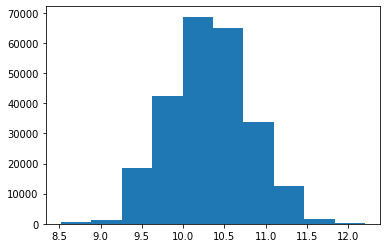

In [ ]:
plt.hist(data['Log1pSalary'])

In [ ]:
print("Before")
print(data["Title"][::100000])

Before
0         Engineering Systems Analyst
100000                   HR Assistant
200000           Senior EC&I Engineer
Name: Title, dtype: object


In [ ]:
import nltk
tokenizer = nltk.tokenize.WordPunctTokenizer()

for col in text_columns:
    data[col] = data[col].apply(lambda l: ' '.join(tokenizer.tokenize(str(l).lower())))

In [ ]:
print("After")
print(data["Title"][::100000])

After
0         engineering systems analyst
100000                   hr assistant
200000         senior ec & i engineer
Name: Title, dtype: object


In [ ]:
data['Title'].values

array(['engineering systems analyst', 'stress engineer glasgow',
       'modelling and simulation analyst', ..., 'english teacher',
       'supply teachers', 'accountant'], dtype=object)

In [ ]:
from collections import Counter
token_counts = Counter()

# Count how many times does each token occur in "Title" and "FullDescription"
for row in data['FullDescription'].values:
  token_counts.update(row.split())

for row in data['Title'].values:
  token_counts.update(row.split())

In [ ]:
print("Total unique tokens :", len(token_counts))
print('\n'.join(map(str, token_counts.most_common(n=5))))
print('...')
print('\n'.join(map(str, token_counts.most_common()[-3:])))

assert token_counts.most_common(1)[0][1] in  range(2600000, 2700000)
assert len(token_counts) in range(200000, 210000)
print('Correct!')

Total unique tokens : 202704
('and', 2657388)
('.', 2523216)
(',', 2318606)
('the', 2080994)
('to', 2019884)
...
('improvemen', 1)
('techniciancivil', 1)
('mlnlycke', 1)
Correct!


Text(0.5, 0, 'Counts')

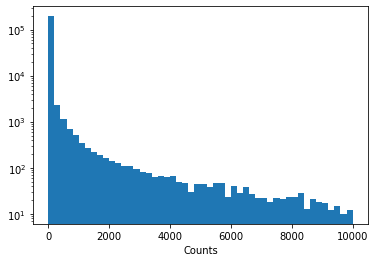

In [ ]:
# Let's see how many words are there for each count

_=plt.hist(list(token_counts.values()), range=[0, 10**4], bins=50, log=True)
plt.xlabel("Counts")

In [ ]:
min_count = 10

# tokens from token_counts keys that had at least min_count occurrences throughout the dataset
tokens = [token for token, count in token_counts.items() if count >= min_count]

# Add a special tokens for unknown and empty words
UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + tokens

In [ ]:
print("Tokens left:", len(tokens))
assert type(tokens)==list
assert len(tokens) in range(32000,35000)
assert 'me' in tokens
assert UNK in tokens
print("Correct!")

Tokens left: 34158
Correct!


In [ ]:
token_to_id = dict()
for i, word in enumerate(tokens):
  token_to_id[word] = i

In [ ]:
assert isinstance(token_to_id, dict)
assert len(token_to_id) == len(tokens)
for tok in tokens:
    assert tokens[token_to_id[tok]] == tok

print("Correct!")

Correct!


In [ ]:
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

def as_matrix(sequences, max_len=None):
    """ Convert a list of tokens into a matrix with padding """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
        
    max_len = min(max(map(len, sequences)), max_len or float('inf'))
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix

In [ ]:
#### print("Lines:")
print('\n'.join(data["Title"][::100000].values), end='\n\n')
print("Matrix:")
print(as_matrix(data["Title"][::100000]))

engineering systems analyst
hr assistant
senior ec & i engineer

Matrix:
[[    2     3     4     1     1]
 [  548  2361     1     1     1]
 [  537 10662   390   307    32]]


In [ ]:
from sklearn.feature_extraction import DictVectorizer

# we only consider top-1k most frequent companies to minimize memory usage
top_companies, top_counts = zip(*Counter(data['Company']).most_common(1000))
recognized_companies = set(top_companies)
data["Company"] = data["Company"].apply(lambda comp: comp if comp in recognized_companies else "Other")

categorical_vectorizer = DictVectorizer(dtype=np.float32, sparse=False)
categorical_vectorizer.fit(data[categorical_columns].apply(dict, axis=1))

DictVectorizer(dtype=<class 'numpy.float32'>, separator='=', sort=True,
               sparse=False)

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size=0.1, random_state=42)

print("Train size = ", len(data_train))
print("Validation size = ", len(data_val))

Train size =  220291
Validation size =  24477


In [ ]:
def generate_batch(data, batch_size=None, replace=True, max_len=None):
    """
    Creates a pytorch-friendly dict from the batch data.
    :returns: a dict with {'title' : int64[batch, title_max_len]
    """
    if batch_size is not None:
        data = data.sample(batch_size, replace=replace)
    
    batch = {}
    for col in text_columns:
        batch[col] = as_matrix(data[col].values, max_len)
    
    batch['Categorical'] = categorical_vectorizer.transform(data[categorical_columns].apply(dict, axis=1))
    
    if target_column in data.columns:
        batch[target_column] = data[target_column].values
    
    return batch

In [ ]:
generate_batch(data_train, 3, max_len=10)

{'Categorical': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'FullDescription': array([[   48,  1982,  1535,   183,   230,    66,   188,  2322,    19,
           183],
        [  299,   691,   104,   120, 19048,   812,  5823,  4098, 14315,
          1098],
        [   17,    65, 26537,   819, 17727,   414,    35,    17,    49,
           101]], dtype=int32),
 'Log1pSalary': array([10.308986, 10.307585, 10.021315], dtype=float32),
 'Title': array([[ 1982,  1535,   712,    96, 18034],
        [  565,  2807,  2822,     1,     1],
        [  937,   896,     1,     1,     1]], dtype=int32)}

In [ ]:
pip install datasets

In [ ]:
from datasets import list_datasets, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import RobertaTokenizer, RobertaModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') #roberta-base
model = BertForSequenceClassification.from_pretrained('bert-base-uncased') #bert-base-uncased

In [ ]:
import torch
device = 'cuda'

In [ ]:
my_data_train = data_train.drop(['SalaryNormalized'], axis=1)
my_data_val = data_val.drop(['SalaryNormalized'], axis=1)

X_train_datset = Dataset.from_pandas(my_data_train)
X_val_dataset = Dataset.from_pandas(my_data_val)

X_train_datset.remove_columns_(['__index_level_0__'])
X_val_dataset.remove_columns_(['__index_level_0__'])

In [ ]:
X_train_tokenized = tokenizer(X_train_datset["FullDescription"],X_train_datset["Title"],X_train_datset["Category"], padding=True, truncation=True, return_tensors="pt").to(device)

### The search for similar questions (3pts)

* Implement a function that takes a text string and finds top-k most similar questions from `quora.txt`
* Demonstrate your function using at least 5 examples

There are no prompts this time: you will have to write everything from scratch.


In [ ]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2021-11-13 17:24:28--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2021-11-13 17:24:28--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucca58c8fc3942a7071373efc2c2.dl.dropboxusercontent.com/cd/0/get/BZ5li9umruk_xiwkhIYJ2a1uVES1xozFes-tf-Dya5aXpUFir5j-m-u571Ahrvd3eVZp2IvRLVeYVdXohwcRk1bxt4jGbJ1HxDSpo_DCqoFydiUAwCu7rh1oRv-o-Depb7ThXT7RnKM7Wxl_o3vXNGHT/file?dl=1# [following]
--2021-11-13 17:24:28--  https://ucca58c8fc3942a7071373efc2c2.dl.dropboxusercontent.com/cd/0/get/BZ5li9umruk_xiwkhIYJ2a1uVES1xozFes-tf-Dya5aXpUFir5j-m-u571Ahrvd3eVZp2IvRLVeYVdXohwcRk1bxt4jGbJ1Hx

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
!pip install -U sentence-transformers

In [ ]:
mySent_list = []
with open("quora.txt", "r") as f:
  for i in f:
    mySent_list.append(i.strip("\n"))

my_model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

In [ ]:
corpus_embeddings = my_model.encode(mySent_list, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/16790 [00:00<?, ?it/s]

In [ ]:
queries = mySent_list[-5:]

In [ ]:
queries

['What are some facts about the various Vice Presidents of India?',
 'What are some suggestions for a project in mechanical engineering for design engineering subject?',
 'Is it necessary to do a diploma in nautical science before joining IMU?',
 'Can you debeak cockerels at 8 months old?',
 'What are the most unintentionally hilarious movies you have ever seen?']

In [ ]:
query_emb = my_model.encode(queries, convert_to_tensor=True)
co_scores = util.pytorch_cos_sim(query_emb, corpus_embeddings)[0]
co_scores

tensor([-0.1137, -0.0676,  0.2008,  ...,  0.0538, -0.0338,  0.1011],
       device='cuda:0')

In [ ]:
best_k = min(5, len(mySent_list))
best_results = torch.topk(co_scores, k=best_k)

In [ ]:
best_results

torch.return_types.topk(values=tensor([1.0000, 0.9810, 0.7507, 0.6983, 0.6838], device='cuda:0'), indices=tensor([537267, 145428, 269465, 220042,  50443], device='cuda:0'))

In [ ]:
for val, indx in zip(best_results[0], best_results[1]):
  print(f'Score: {val} ==> "{mySent_list[indx]}"')

Score: 1.0000001192092896 ==> "What are some facts about the various Vice Presidents of India?"
Score: 0.9810048937797546 ==> "What are some interesting facts about various vice presidents of India?"
Score: 0.7506682872772217 ==> "What does the Vice President of India do?"
Score: 0.6982877254486084 ==> "Who is the vice-president of India?"
Score: 0.683841347694397 ==> "What are some infamous facts about famous Indian politicians?"


In [ ]:
for iter in range(0, 5):
  co_scores = util.pytorch_cos_sim(query_emb, corpus_embeddings)[iter]
  best_k = min(5, len(mySent_list))
  best_results = torch.topk(co_scores, k=best_k)

  for val, indx in zip(best_results[0], best_results[1]):
    print(f'Score: {val} ==> "{mySent_list[indx]}"')
  print('\n\n $$$$$$$$$$$$$$$$$$$$$$$$$$$$ \n\n')

Score: 1.0000001192092896 ==> "What are some facts about the various Vice Presidents of India?"
Score: 0.9810048937797546 ==> "What are some interesting facts about various vice presidents of India?"
Score: 0.7506682872772217 ==> "What does the Vice President of India do?"
Score: 0.6982877254486084 ==> "Who is the vice-president of India?"
Score: 0.683841347694397 ==> "What are some infamous facts about famous Indian politicians?"


 $$$$$$$$$$$$$$$$$$$$$$$$$$$$ 


Score: 1.000000238418579 ==> "What are some suggestions for a project in mechanical engineering for design engineering subject?"
Score: 0.8952311873435974 ==> "What are some good project ideas for mechanical engineering?"
Score: 0.856448233127594 ==> "Can you suggest some projects for mechanical engineering students that includes design and analysis?"
Score: 0.8458020687103271 ==> "What are some Project ideas for mechanical engineering students?"
Score: 0.8405192494392395 ==> "What are some mechanical engineering projects?"


```















```

__Bonus demo:__ transformer language models. 

`/* No points awarded for this task, but its really cool, we promise :) */`

In [ ]:
import torch
import numpy as np
from transformers import GPT2Tokenizer, GPT2LMHeadModel
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', add_prefix_space=True)
model = GPT2LMHeadModel.from_pretrained('gpt2').train(False).to(device)

text = "The Fermi paradox "
tokens = tokenizer.encode(text)
num_steps = 1024
line_length, max_length = 0, 70

print(end=tokenizer.decode(tokens))

for i in range(num_steps):
    with torch.no_grad():
        logits = model(torch.as_tensor([tokens], device=device))[0]
    p_next = torch.softmax(logits[0, -1, :], dim=-1).data.cpu().numpy()

    next_token_index = p_next.argmax() #<YOUR CODE: REPLACE THIS LINE>
    # YOUR TASK: change the code so that it performs nucleus sampling

    tokens.append(int(next_token_index))
    print(end=tokenizer.decode(tokens[-1]))
    line_length += len(tokenizer.decode(tokens[-1]))
    if line_length >= max_length:
        line_length = 0
        print()



Transformers knowledge hub: https://huggingface.co/transformers/